In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ad_expense_data = pd.read_csv("C:\\Users\\HP\\Downloads\\sales.csv")

In [4]:
ad_expense_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
ad_expense_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
ad_expense_data.shape

(200, 4)

In [7]:
ad_expense_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
ad_expense_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

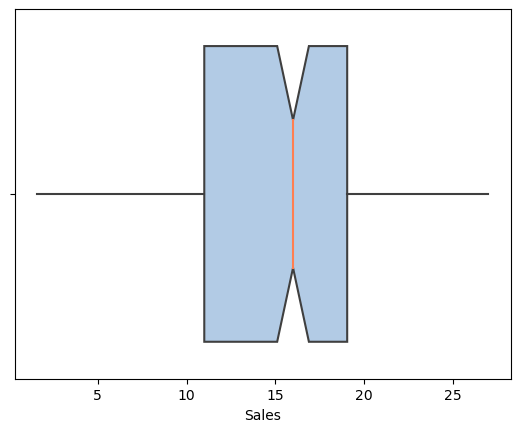

In [9]:
sns.boxplot(x= ad_expense_data['Sales'],  notch = True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
plt.show()

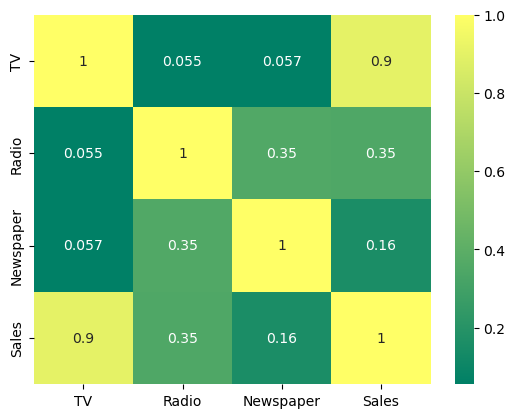

In [10]:
corr = ad_expense_data.corr()
sns.heatmap(corr, annot= True, cmap = 'summer')
plt.show()

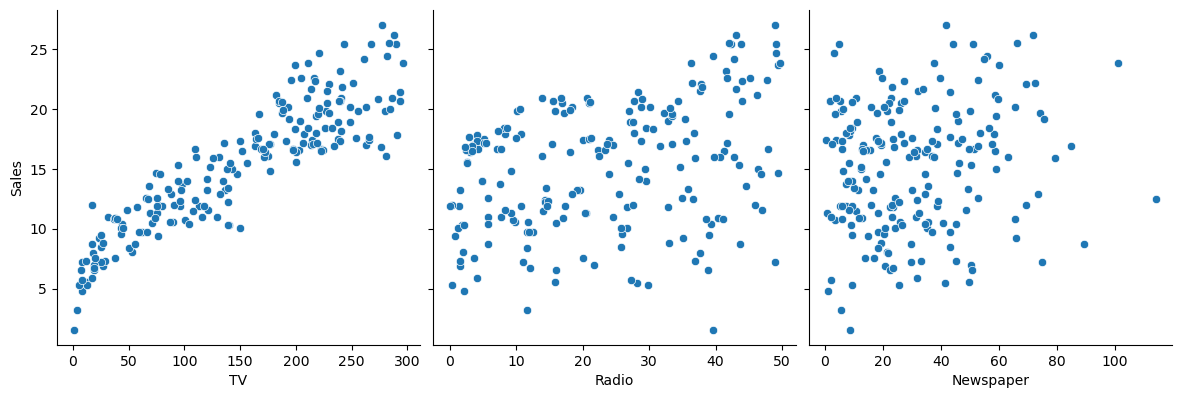

In [11]:
sns.pairplot(ad_expense_data, x_vars = ['TV','Radio','Newspaper'], y_vars=['Sales'], kind = 'scatter', aspect = 1, height = 4)

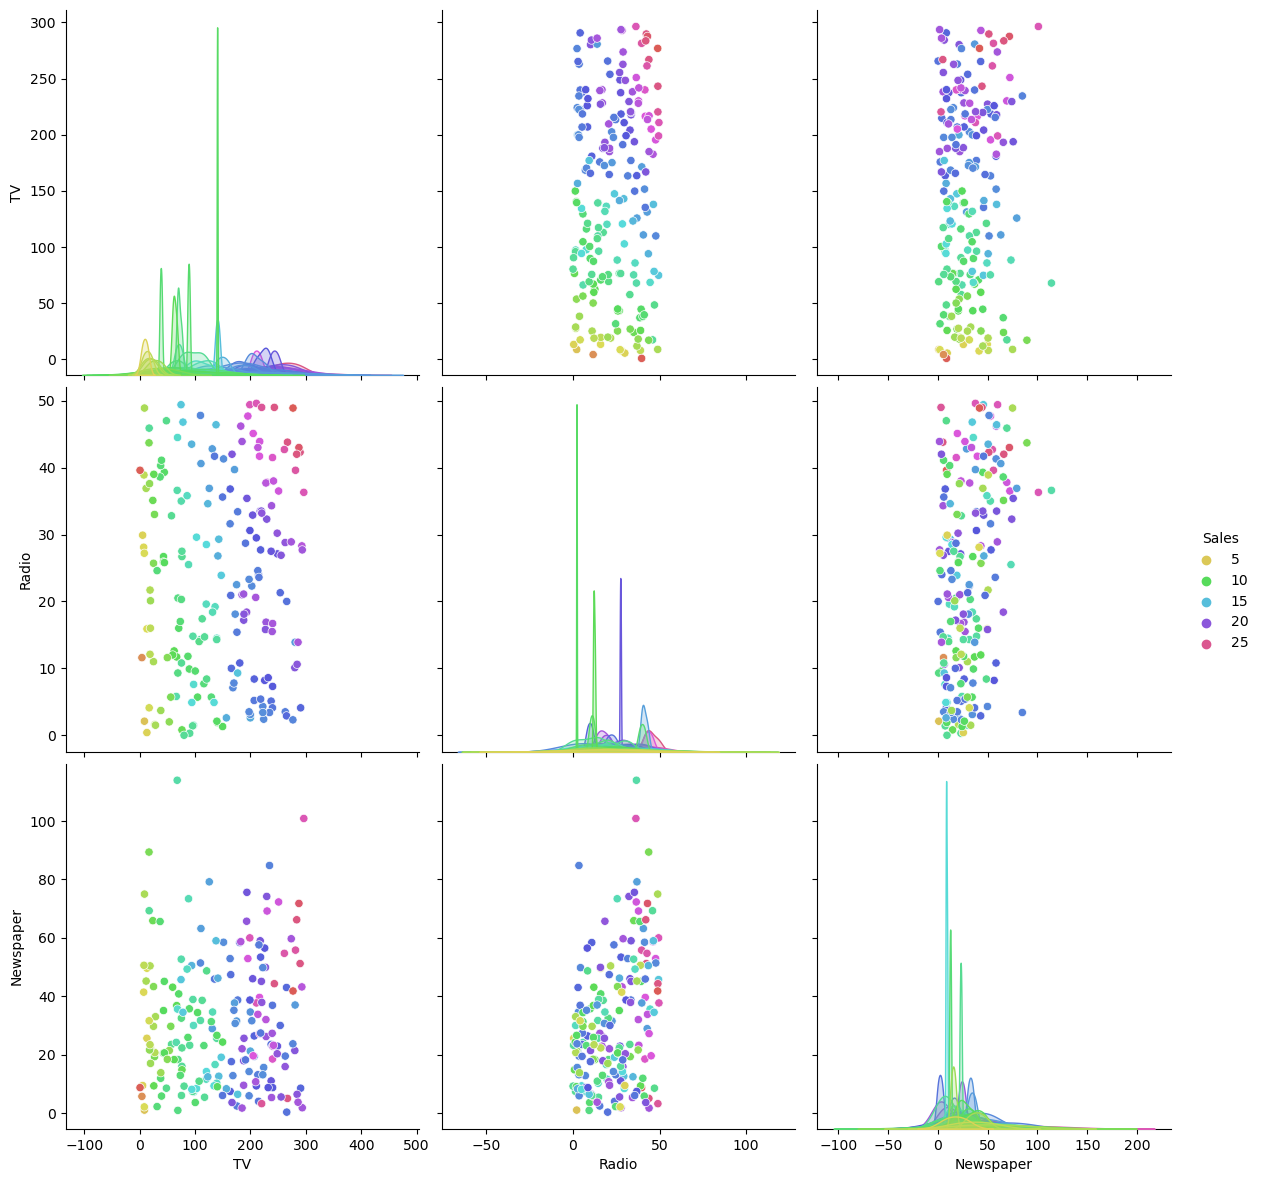

In [12]:
sns.pairplot(ad_expense_data, kind = 'scatter', aspect = 1, height = 4, palette = 'hls', hue='Sales')

In [13]:
x = ad_expense_data['TV']
y = ad_expense_data['Sales']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 120)
print(x_train.head())
print(y_train.head())

111    241.7
156     93.9
140     73.4
171    164.5
157    149.8
Name: TV, dtype: float64
111    21.8
156    15.3
140    10.9
171    17.5
157    10.1
Name: Sales, dtype: float64


In [15]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const    6.573326
TV       0.058614
dtype: float64

In [16]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     606.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           2.24e-52
Time:                        22:32:37   Log-Likelihood:                -317.66
No. Observations:                 140   AIC:                             639.3
Df Residuals:                     138   BIC:                             645.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5733      0.396     16.582      0.0

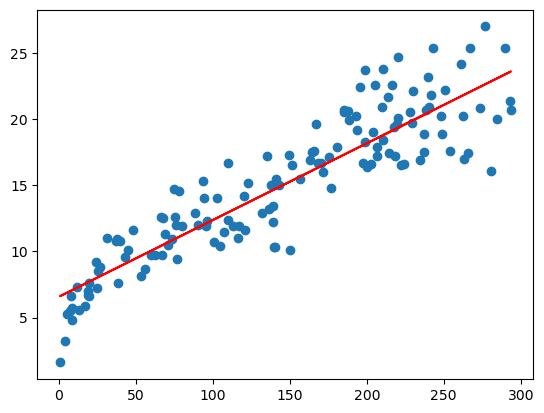

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [17]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.57 + 0.058*x_train, 'r')
plt.show()
plt.figure(figsize=(20,20))

C:\Users\HP\AppData\Local\Temp\ipykernel_14556\2208886058.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15, color = 'green')


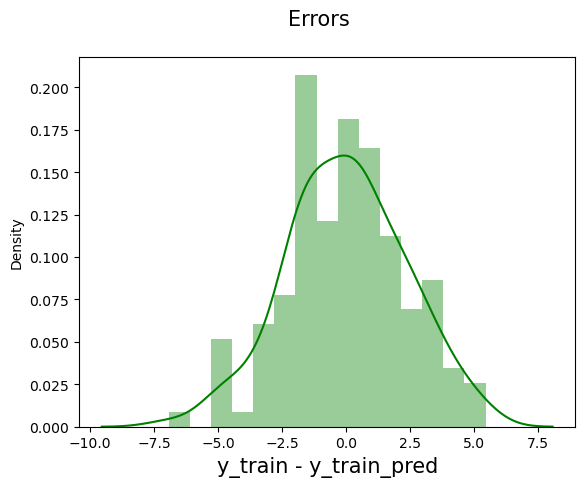

In [18]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15, color = 'green')
fig.suptitle('Errors', fontsize = 15)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

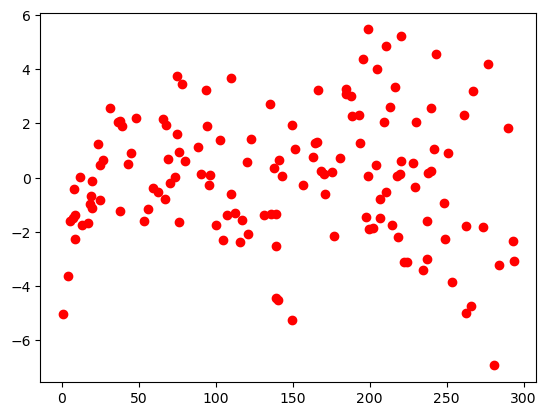

In [19]:
plt.scatter(x_train,res, c= 'red' )
plt.show()

NameError: name 'y_pred' is not defined

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



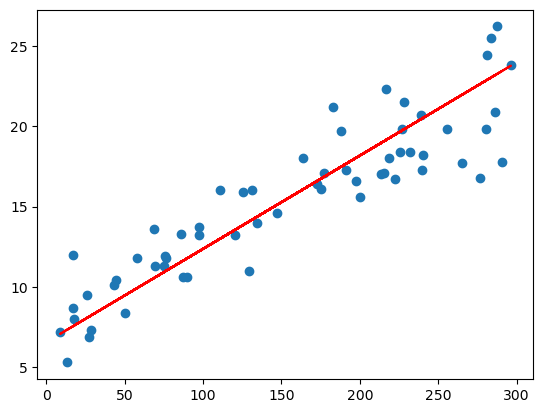

In [25]:

plt.scatter(x_test, y_test)
plt.plot(x_test, 6.57 + 0.058 * x_test, 'r')
plt.show()


In [26]:
x_test_sm = sm.add_constant(x_test)

In [27]:
y_pred = lr.predict(x_test_sm)
y_pred.head()

87     13.061903
118    13.941114
80     11.051441
198    23.196275
62     20.599672
dtype: float64